# **Prévisions d'un Crédit Logement**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/home-loan/train.csv
/kaggle/input/home-loan/test.csv


# **Import des données**

In [2]:
# Import des données d'entrainement

df_credit=pd.read_csv('/kaggle/input/home-loan/train.csv')


In [3]:
# Visualiser le Dataframe

df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Faire une copie de travail du Dataframe

df=df_credit.copy()

In [5]:
# Visualiser le Dataframe

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
# Examen des colonnes du Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Dimensions du Dataframe

df.shape

(614, 13)

In [8]:
# Combien y a-t-il des valeurs manquantes ?

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Pour supprimer les valeurs manquantes :
## - pour les variables catégoriellles, on les remplace par la valeur modale
## - pour les variables numériques, on va les remplacer par la médiane

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
# Faire 3 listes pour les types de variables, nous en aurons besoin.

var_cat=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
var_cat_source=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area']
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
print('Les variables catégorielles sont : ', var_cat)
print('Les variables numériques sont : ', var_num)

Les variables catégorielles sont :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
Les variables numériques sont :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [11]:
# Supprimer les valeurs manquantes pour les variables catégorielles et les remplacer par la valeur modale
# On ajoute [0] pour forcer le remplacement par la première valeur modale, car
# il  pourrait y en avoir plusieurs

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)


In [12]:
# Supprimer les valeurs manquantes pour les variables numériques

#df['ApplicantIncome'].fillna(df['ApplicantIncome'].median()[0],inplace=True)
#df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median()[0],inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)


In [13]:
# Combien y a-t-il des valeurs manquantes ?

#df.isnull().sum()

In [14]:
# Analyse univariée de la variable cible
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
# Analyse univariée de la variable cible en pourcentage
round(df['Loan_Status'].value_counts(normalize=True)*100, 2)

Y    68.73
N    31.27
Name: Loan_Status, dtype: float64

<Axes: title={'center': 'Crédits accordés ou non'}>

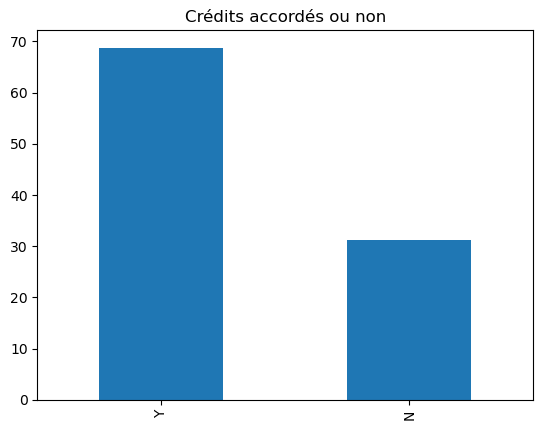

In [16]:
# Graphique d'analyse univariée  de la variable cible
round(df['Loan_Status'].value_counts(normalize=True)*100, 2).plot.bar(title="Crédits accordés ou non")

# **Analyse Univariée des variables catégorielles**

## **Le Genre**

In [17]:
# Analyse univariée d'une variable source
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [18]:
# Analyse univariée d'une variable source en pourcentage
round(df['Gender'].value_counts(normalize=True)*100, 2)

Male      81.76
Female    18.24
Name: Gender, dtype: float64

<Axes: title={'center': 'Répartition % des demandes de crédits par Genre'}>

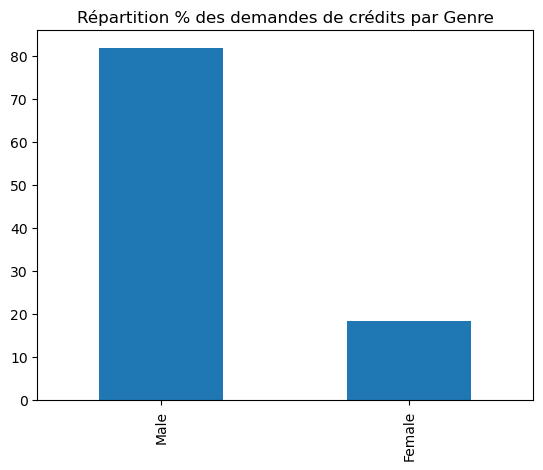

In [19]:
# Graphique d'analyse univariée d'une variable source en pourcentage
round(df['Gender'].value_counts(normalize=True)*100, 2).plot.bar(title="Répartition % des demandes de crédits par Genre")

## **Le Mariage**

In [20]:
# Analyse univariée d'une variable source
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [21]:
# Analyse univariée d'une variable source en pourcentage
round(df['Married'].value_counts(normalize=True)*100, 2)

Yes    65.31
No     34.69
Name: Married, dtype: float64

<Axes: title={'center': 'Répartition % des demandes de crédits par Statut Marié ou non'}>

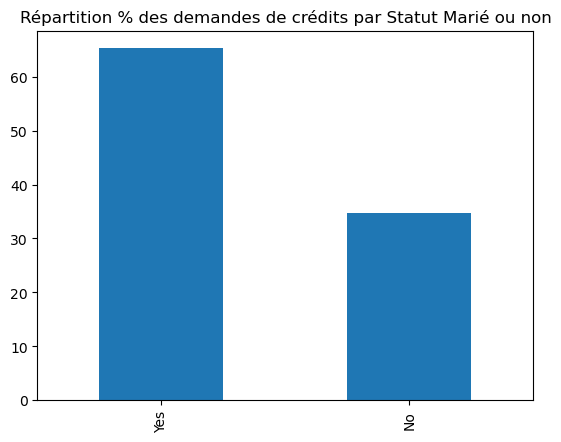

In [22]:
# Graphique d'analyse univariée d'une variable source en pourcentage
round(df['Married'].value_counts(normalize=True)*100, 2).plot.bar(title="Répartition % des demandes de crédits par Statut Marié ou non")

## **Le nombre d'enfants**

In [23]:
# Analyse univariée d'une variable source
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [24]:
# Analyse univariée d'une variable source en pourcentage
round(df['Dependents'].value_counts(normalize=True)*100, 2)

0     58.63
1     16.61
2     16.45
3+     8.31
Name: Dependents, dtype: float64

<Axes: title={'center': "Répartition % des demandes de crédits par Nombre d'enfants"}>

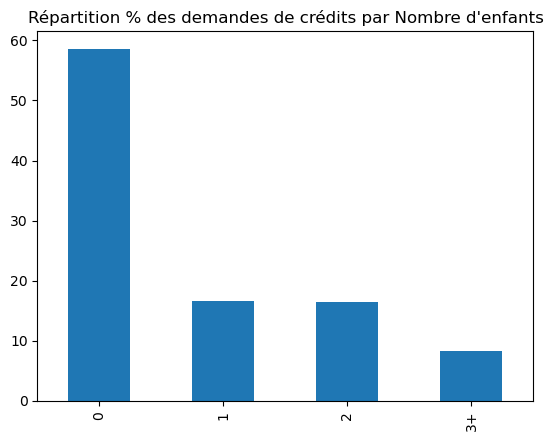

In [25]:
# Graphique d'analyse univariée d'une variable source en pourcentage
round(df['Dependents'].value_counts(normalize=True)*100, 2).plot.bar(title="Répartition % des demandes de crédits par Nombre d'enfants")

## **Le niveau d'éducation**

In [26]:
# Analyse univariée d'une variable source
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [27]:
# Analyse univariée d'une variable source en pourcentage
round(df['Education'].value_counts(normalize=True)*100, 2)

Graduate        78.18
Not Graduate    21.82
Name: Education, dtype: float64

<Axes: title={'center': "Répartition % des demandes de crédits par Niveau d'éducation"}>

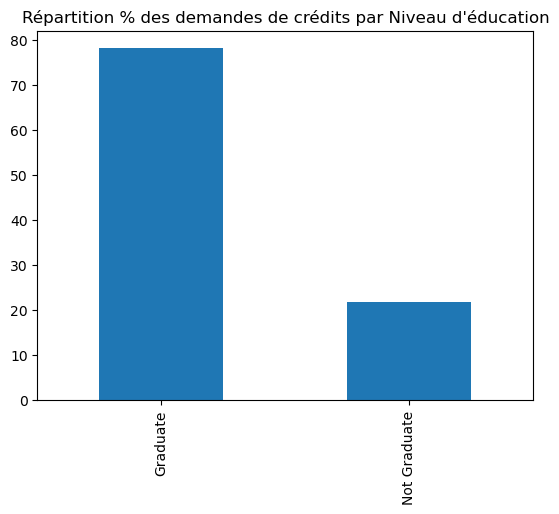

In [28]:
# Graphique d'analyse univariée d'une variable source en pourcentage
round(df['Education'].value_counts(normalize=True)*100, 2).plot.bar(title="Répartition % des demandes de crédits par Niveau d'éducation")

## **Le type d'emploi**

In [29]:
# Analyse univariée d'une variable source
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
# Analyse univariée d'une variable source en pourcentage
round(df['Self_Employed'].value_counts(normalize=True)*100, 2)

No     86.64
Yes    13.36
Name: Self_Employed, dtype: float64

In [31]:
# Analyse univariée d'une variable source en pourcentage
round(df['Self_Employed'].value_counts(normalize=True)*100, 2)

No     86.64
Yes    13.36
Name: Self_Employed, dtype: float64

<Axes: title={'center': "Répartition % des demandes de crédits par Type d'emploi"}>

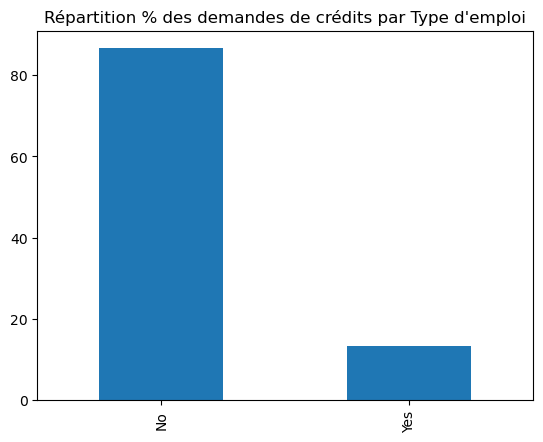

In [32]:
# Graphique d'analyse univariée d'une variable source en pourcentage
round(df['Self_Employed'].value_counts(normalize=True)*100, 2).plot.bar(title="Répartition % des demandes de crédits par Type d'emploi")

## **Les historiques de crédit**

In [33]:
# Analyse univariée d'une variable source
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [34]:
# Analyse univariée d'une variable source en pourcentage
round(df['Credit_History'].value_counts(normalize=True)*100, 2)

1.0    85.5
0.0    14.5
Name: Credit_History, dtype: float64

<Axes: title={'center': 'Répartition % des demandes de crédits par Historique de crédit'}>

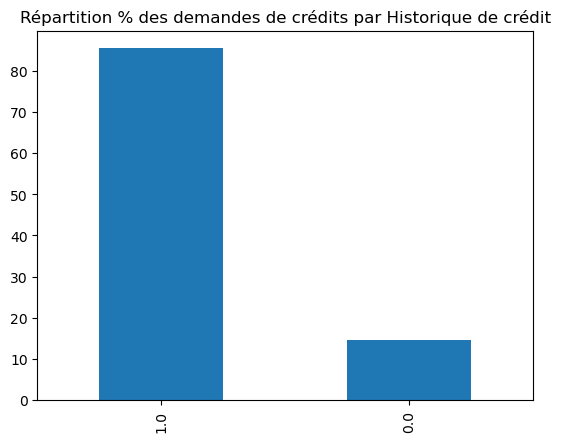

In [35]:
# Graphique d'analyse univariée d'une variable source en pourcentage
round(df['Credit_History'].value_counts(normalize=True)*100, 2).plot.bar(title="Répartition % des demandes de crédits par Historique de crédit")

## **La superficie de la propriété**

In [36]:
# Analyse univariée d'une variable source
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [37]:
# Analyse univariée d'une variable source en pourcentage
round(df['Property_Area'].value_counts(normalize=True)*100, 2)

Semiurban    37.95
Urban        32.90
Rural        29.15
Name: Property_Area, dtype: float64

<Axes: title={'center': 'Répartition % des demandes de crédits par Superficie de la propriété'}>

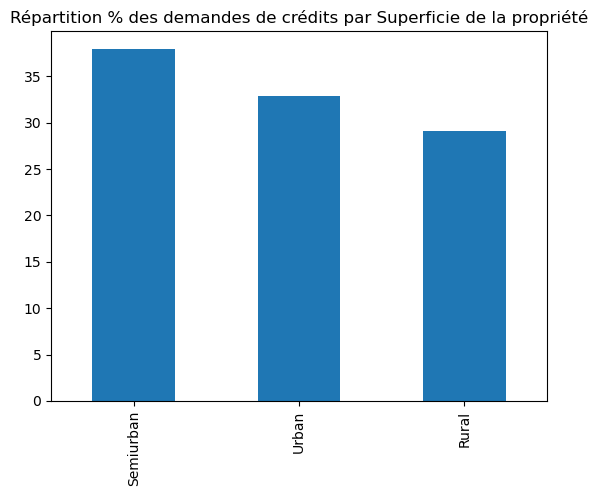

In [38]:
# Graphique d'analyse univariée d'une variable source en pourcentage
round(df['Property_Area'].value_counts(normalize=True)*100, 2).plot.bar(title="Répartition % des demandes de crédits par Superficie de la propriété")

# **Analyse Univariée des variables numériques**

In [39]:
# Analyse des variables numériques

df[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


## **Le salaire de l'emprunteur**

/tmp/ipykernel_20/974375728.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


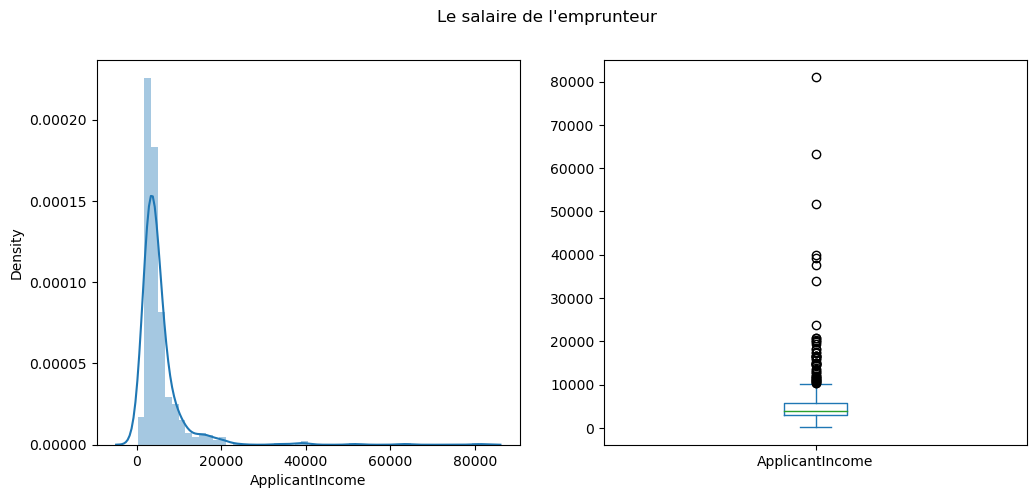

In [40]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(12,5))

plt.suptitle("Le salaire de l'emprunteur")
plt.show()


## **Le salaire du conjoint**

/tmp/ipykernel_20/4034267656.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


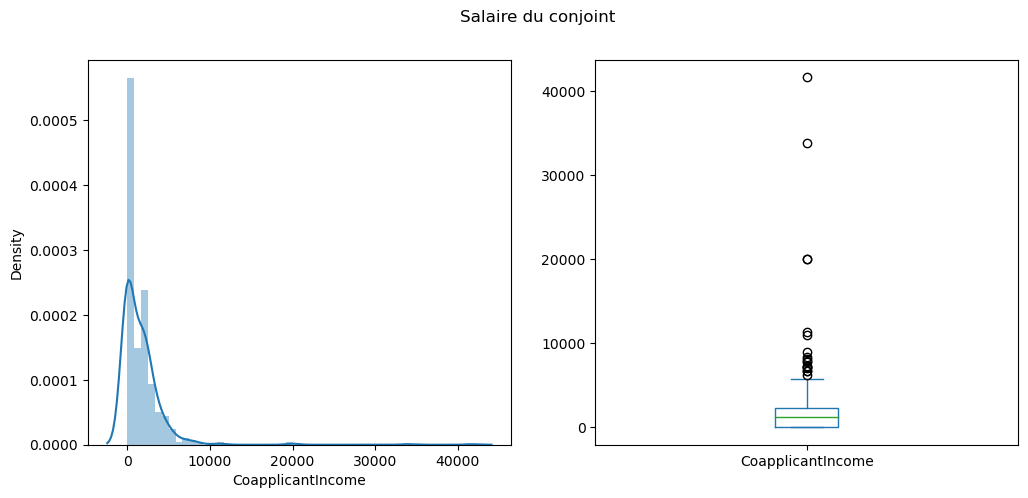

In [41]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(12,5))

plt.suptitle('Salaire du conjoint')
plt.show()


## **Le Montant de l'emprunt**

/tmp/ipykernel_20/1172515325.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


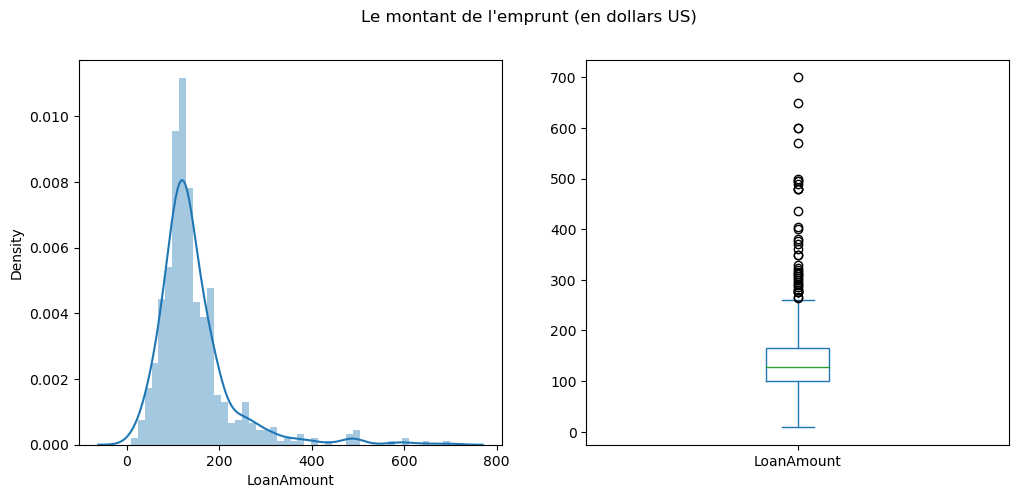

In [42]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(12,5))

plt.suptitle("Le montant de l'emprunt (en dollars US)")
plt.show()


## **La durée de l'emprunt**

/tmp/ipykernel_20/3497925813.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


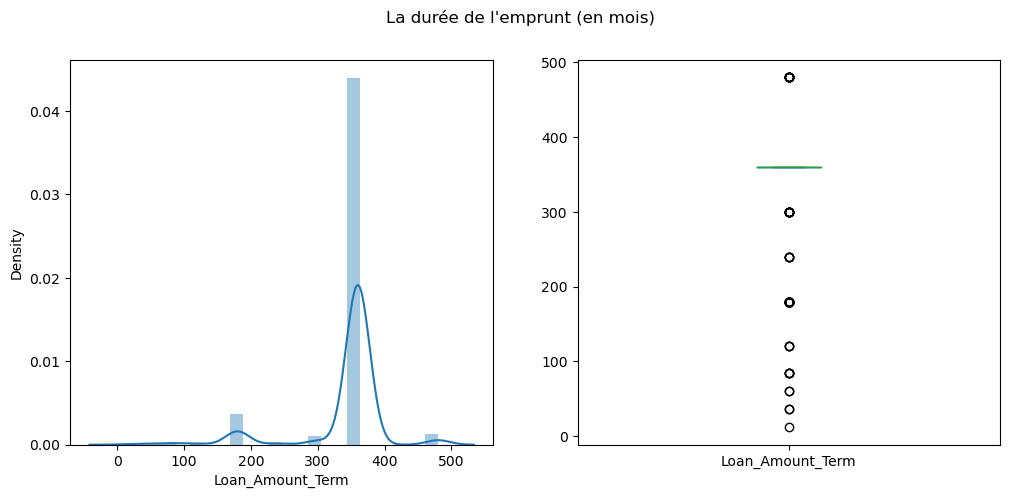

In [43]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df['Loan_Amount_Term'])

plt.subplot(122)
df['Loan_Amount_Term'].plot.box(figsize=(12,5))

plt.suptitle("La durée de l'emprunt (en mois)")
plt.show()


# **Analyse Bivariée**

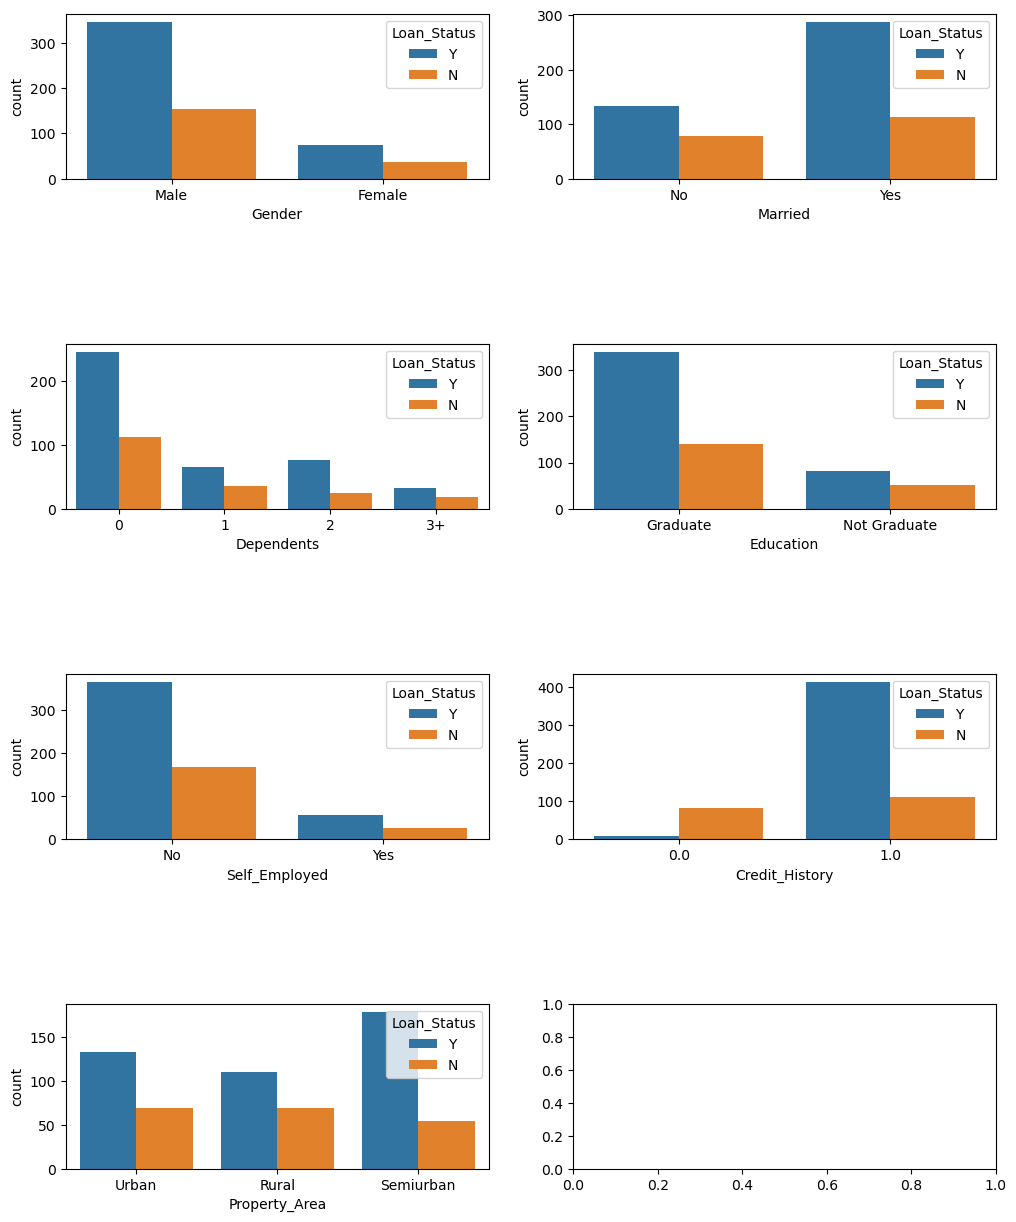

In [44]:
# Corrélation entre les variables catégorielles et l'acceptation du crédit
fig,axes=plt.subplots(4,2, figsize=(12,15))

for idx,cat_col in enumerate(var_cat_source):
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row,col])
                                                                
plt.subplots_adjust(hspace=1)

/tmp/ipykernel_20/3373131951.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix=df.corr()


<Axes: >

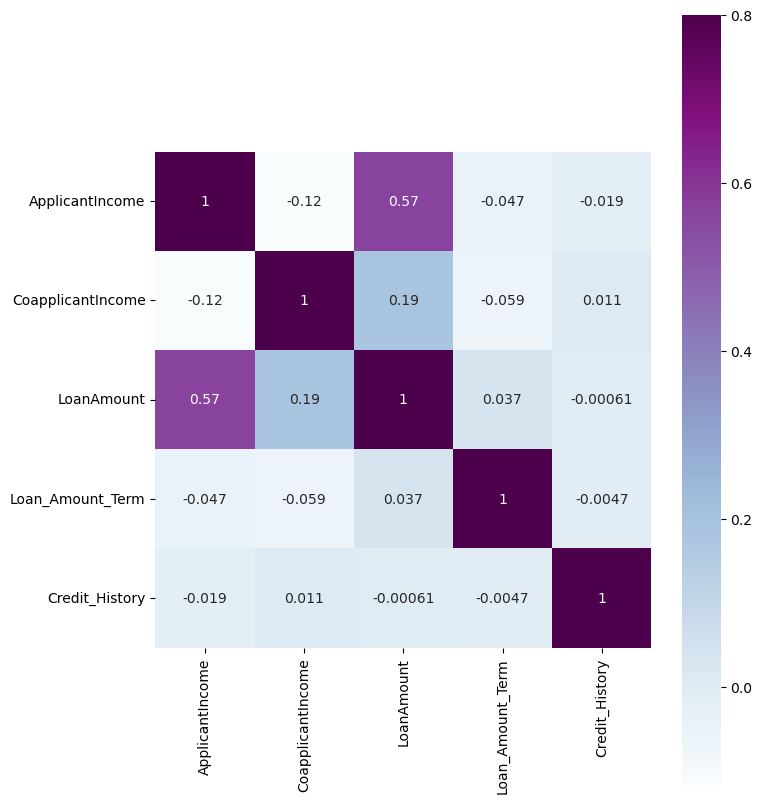

In [45]:
# Corrélation des variables numériques

matrix=df.corr()
f,ax=plt.subplots(figsize=(8,10))
sns.heatmap(matrix,vmax=.8, square=True, cmap='BuPu', annot=True)

# **3ème partie : Création du modèle**

In [46]:
# création d'un dataset avec les seules variables catégorielles
df_cat=df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


## **remplacer les variables catégorielles par des valeurs numériques**

In [47]:
df_cat=pd.get_dummies(df_cat, drop_first=True)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1
610,1.0,1,1,0,0,1,0,0,0,0,1
611,1.0,1,1,1,0,0,0,0,0,1,1
612,1.0,1,1,0,1,0,0,0,0,1,1


In [48]:
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1
610,1.0,1,1,0,0,1,0,0,0,0,1
611,1.0,1,1,1,0,0,0,0,0,1,1
612,1.0,1,1,0,1,0,0,0,0,1,1


In [49]:
df_num=df[var_num]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [50]:
df_encoded=pd.concat([df_cat,df_num], axis=1)
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [51]:
y=df_encoded['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [52]:
X=df_encoded.drop('Loan_Status_Y', axis=1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0


In [53]:
# spécifier la partie test et la partie train

x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=6)

In [54]:
# instancier le modèle

clf=LogisticRegression()

# entraîner le modèle

clf.fit(x_train, y_train)

LogisticRegression()

In [55]:
# Tester le modèle
pred=clf.predict(x_test)
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [56]:
y_test

387    0
266    1
292    1
392    1
332    1
      ..
309    1
511    1
98     1
238    1
462    1
Name: Loan_Status_Y, Length: 123, dtype: uint8

In [57]:
# Pour voir la probabilité précise
proba=clf.predict_proba(x_test)
proba

array([[0.91171015, 0.08828985],
       [0.11396972, 0.88603028],
       [0.18169396, 0.81830604],
       [0.21363004, 0.78636996],
       [0.22786897, 0.77213103],
       [0.18724369, 0.81275631],
       [0.926466  , 0.073534  ],
       [0.12522863, 0.87477137],
       [0.11477607, 0.88522393],
       [0.12971711, 0.87028289],
       [0.19892166, 0.80107834],
       [0.35190067, 0.64809933],
       [0.15029302, 0.84970698],
       [0.04670302, 0.95329698],
       [0.22591443, 0.77408557],
       [0.15221685, 0.84778315],
       [0.15836759, 0.84163241],
       [0.22976329, 0.77023671],
       [0.13656561, 0.86343439],
       [0.18709073, 0.81290927],
       [0.1454006 , 0.8545994 ],
       [0.3226353 , 0.6773647 ],
       [0.15485752, 0.84514248],
       [0.26769788, 0.73230212],
       [0.1889516 , 0.8110484 ],
       [0.22301012, 0.77698988],
       [0.29023997, 0.70976003],
       [0.14992815, 0.85007185],
       [0.27415732, 0.72584268],
       [0.3470879 , 0.6529121 ],
       [0.

In [58]:
accuracy_score(y_test, pred)

0.8373983739837398

In [59]:
X.columns

Index(['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [60]:
# Faire une prévision
profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
clf.predict(profil_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [61]:
# Enregistrer le modèle avec la commande pickle

pickle.dump(clf,open('/kaggle/working/prevision_credit.pkl','wb'))


In [62]:
#vérifions l'enregistrement du fichier

directory = '/kaggle/working'

# Liste des fichiers dans le répertoire
files = os.listdir(directory)

# Affichage des fichiers
for file in files:
    print(file)

prevision_credit.pkl
__notebook__.ipynb
